In [1]:
## Problem 2

In [161]:
import pandas as pd

In [162]:
df=pd.read_csv('carData.csv')
df.head()

,Example NO,Color,Type,Origin,Stolen
0,1,Red,Sports,Domestic,Yes
1,2,Red,Sports,Domestic,No
2,3,Red,Sports,Domestic,Yes
3,4,Yellow,Sports,Domestic,No
4,5,Yellow,Sports,Imported,Yes


In [163]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
color_encoded=le.fit_transform(df["Color"])
type_encoded=le.fit_transform(df["Type"])
origin_encoded=le.fit_transform(df["Origin"])
stolen_encoded=le.fit_transform(df["Stolen"])

print('color_encoded',color_encoded)
print('type_encoded',type_encoded)
print('origin_encoded',origin_encoded)
print('stolen_encoded',stolen_encoded)

color_encoded [0 0 0 1 1 1 1 1 0 0]
type_encoded [1 1 1 1 1 0 0 0 0 1]
origin_encoded [0 0 0 0 1 1 1 0 1 1]
stolen_encoded [1 0 1 0 1 0 1 0 0 1]


In [164]:
list(le.inverse_transform([0, 1]))

['No', 'Yes']

In [165]:
# Converting string labels into numbers
color_encoded=le.fit_transform(df["Color"])
label=le.fit_transform(df["Stolen"])
print("Color:",color_encoded)
print("Stolen:",label)

Color: [0 0 0 1 1 1 1 1 0 0]
Stolen: [1 0 1 0 1 0 1 0 0 1]


In [166]:
#Combinig data into single listof tuples
features=[]
for a,b,c,d in zip(color_encoded,type_encoded,origin_encoded,stolen_encoded):
    features.append((a,b,c,d))
print(features)

[(0, 1, 0, 1), (0, 1, 0, 0), (0, 1, 0, 1), (1, 1, 0, 0), (1, 1, 1, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 0, 0, 0), (0, 0, 1, 0), (0, 1, 1, 1)]


In [167]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,0,0,1]]) # red suv domestic

predicted

array([1])

In [9]:
# 1 indicates that car was stolen

In [10]:
# Problem 3

In [168]:
df=pd.read_csv('problem3.csv')

In [169]:
# Exploratory data analysis
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
import pandas_profiling
prof = df.profile_report()
prof.to_file(output_file = "profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [0]:
# no missing values

In [170]:
# convert categorical values to numerical
df["workclass"]=le.fit_transform(df["workclass"])
df["education"]=le.fit_transform(df["education"])
df["marital_status"]=le.fit_transform(df["marital_status"])
df["occupation"]=le.fit_transform(df["occupation"])
df["relationship"]=le.fit_transform(df["relationship"])
df["race"]=le.fit_transform(df["race"])
df["sex"]=le.fit_transform(df["sex"])
df["native_country"]=le.fit_transform(df["native_country"])
df["income"]=le.fit_transform(df["income"])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [171]:
# split into training and testing sets
features=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']
x = df[features] # features
y = df.income # target value

from sklearn.preprocessing import StandardScaler # to scale data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(x),y,test_size=0.30,random_state=42)

In [172]:
# Training Set

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
predicted= model.predict(x_train)

predicted

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
# accuracy score Test set
from sklearn import metrics
metrics.accuracy_score(predicted,y_train)

0.8070375570375571

True positives:  16473
False positives:  851
False negatives:  3547
True negatives:  1921


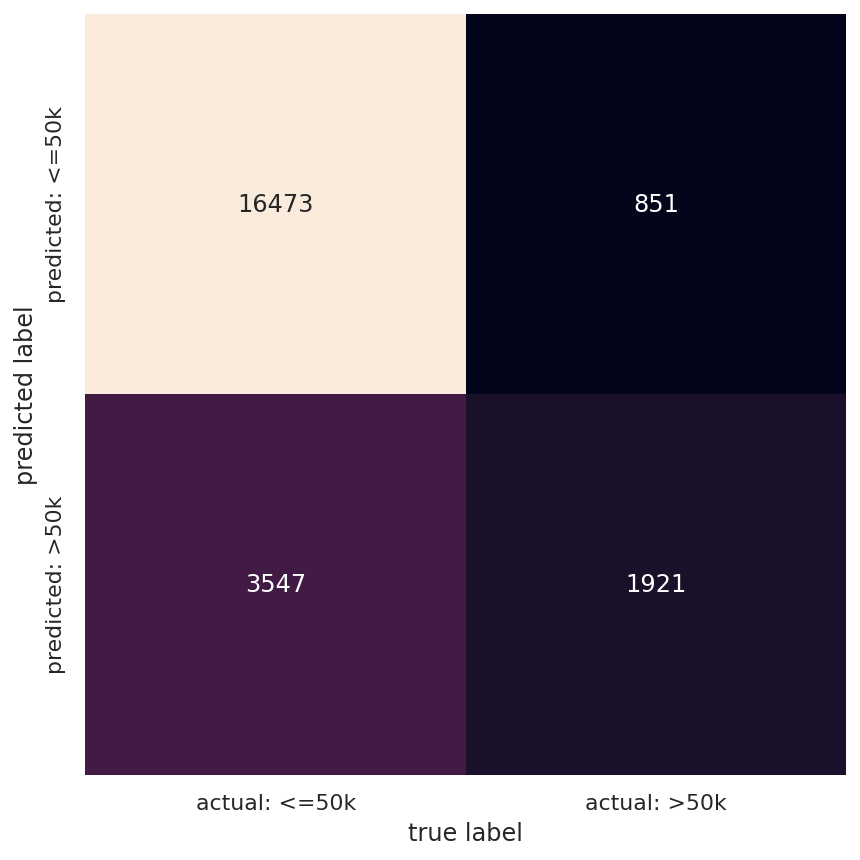

In [174]:
# confusion matrix Train set
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_train, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: <=50k','actual: >50k'],
            yticklabels=['predicted: <=50k','predicted: >50k'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [175]:
# classification report Train set
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.82      0.95      0.88     17324
        True       0.69      0.35      0.47      5468

    accuracy                           0.81     22792
   macro avg       0.76      0.65      0.67     22792
weighted avg       0.79      0.81      0.78     22792



In [176]:
# Test Set

#Predict Output
predicted= model.predict(x_test)

predicted

array([0, 0, 0, ..., 0, 0, 0])

In [177]:
# accuracy score Test set
metrics.accuracy_score(predicted,y_test)

0.8087633087633087

True positives:  7071
False positives:  324
False negatives:  1544
True negatives:  829


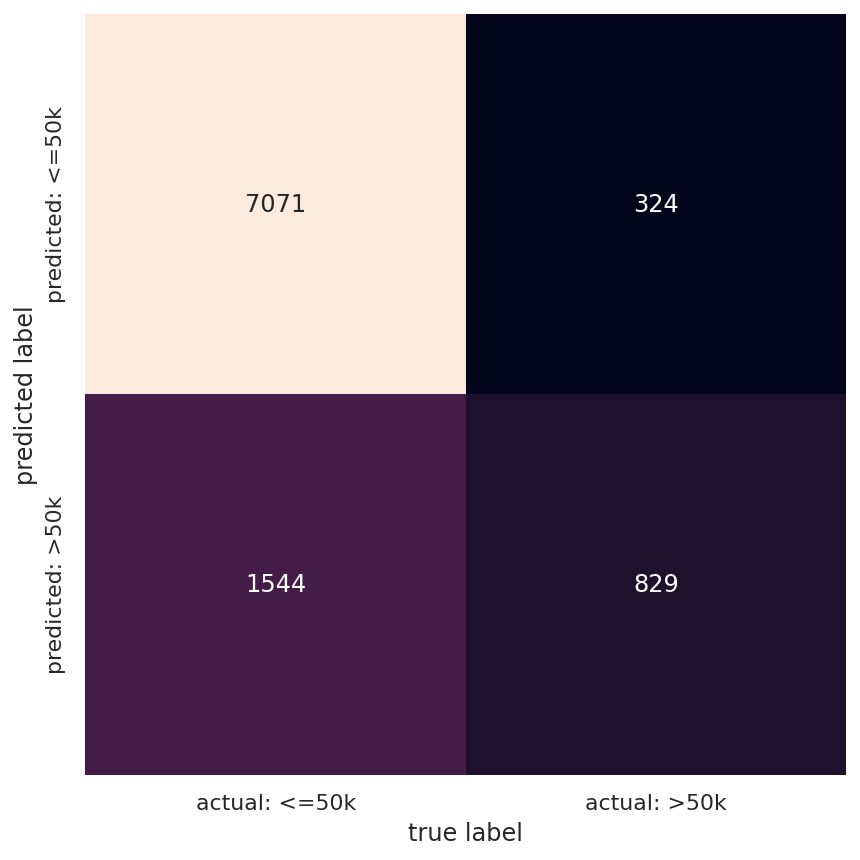

In [178]:
# confusion matrix Test set
mat = confusion_matrix(y_test, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: <=50k','actual: >50k'],
            yticklabels=['predicted: <=50k','predicted: >50k'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [179]:
# classification report Test set
print(classification_report(y_test, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.82      0.96      0.88      7395
        True       0.72      0.35      0.47      2373

    accuracy                           0.81      9768
   macro avg       0.77      0.65      0.68      9768
weighted avg       0.80      0.81      0.78      9768



In [180]:
classes = model.predict_proba(x_test)

(array([ 970.,   29.,   38.,   38.,   78.,  155.,  207.,  329.,  846.,
        7078.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

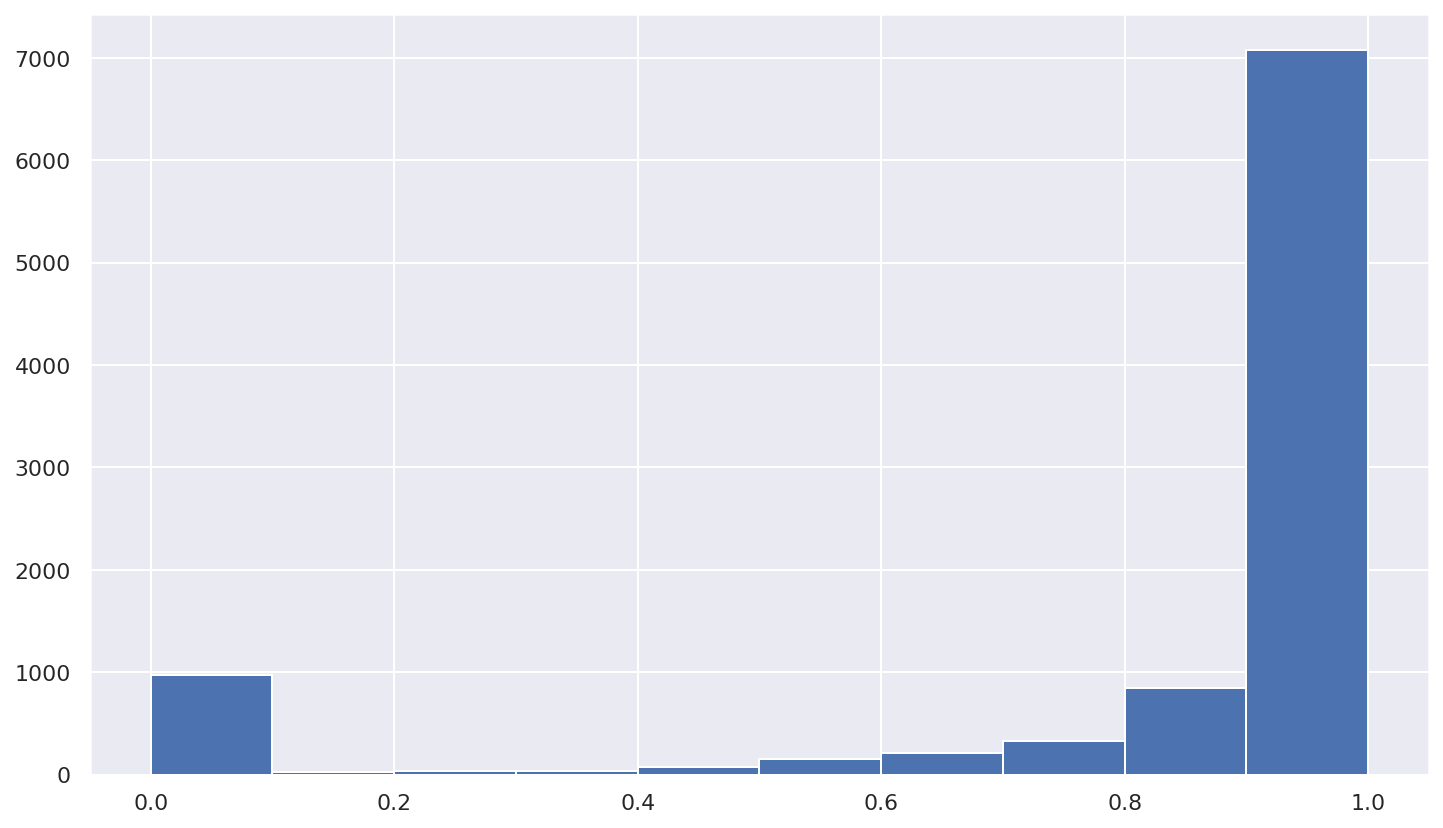

In [181]:
# Histograms
# Class 1
plt.hist(classes[:,0])

(array([7078.,  846.,  329.,  207.,  155.,   78.,   38.,   38.,   29.,
         970.]),
 array([2.21901816e-11, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

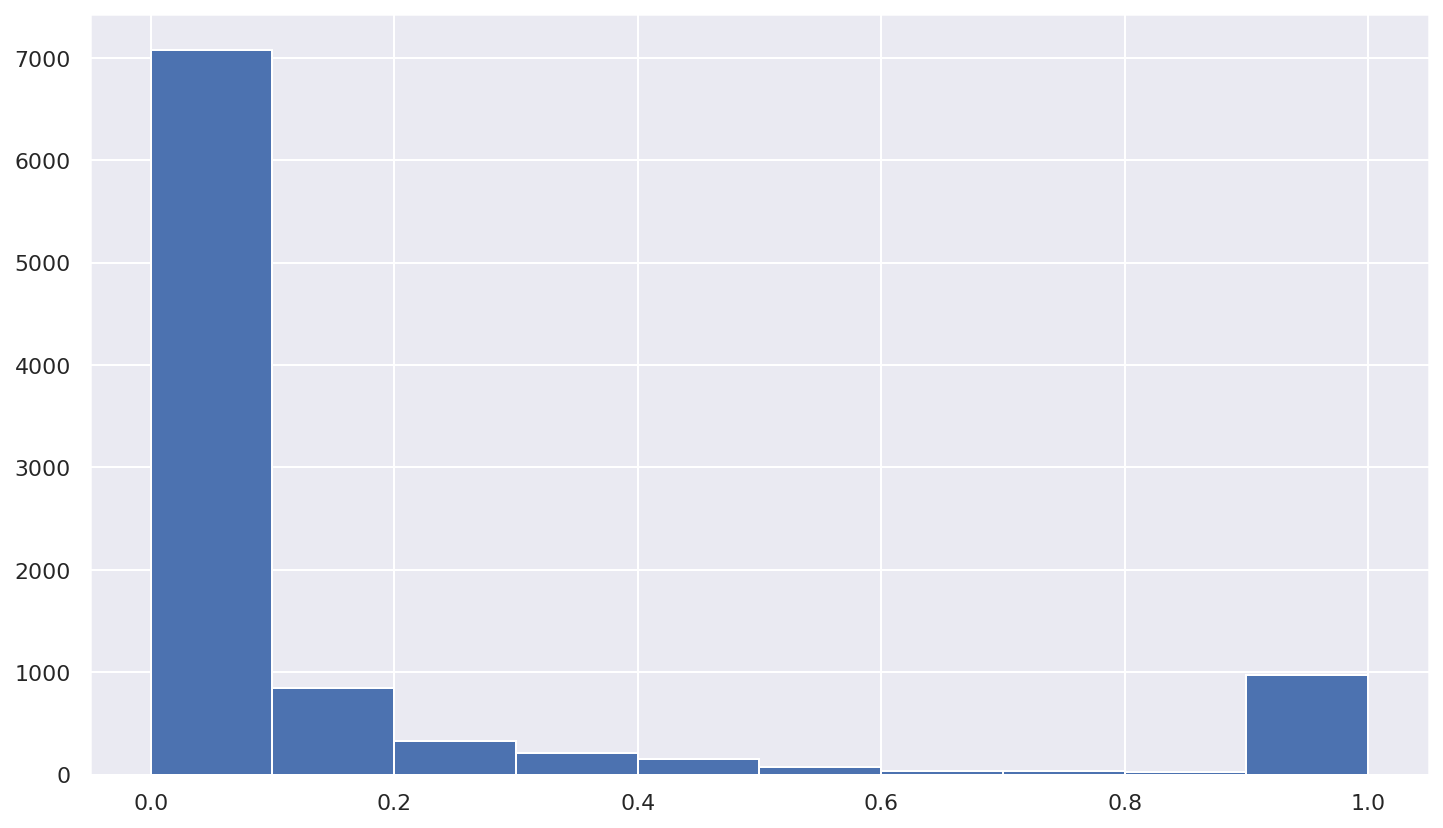

In [182]:
# Class 2
plt.hist(classes[:,1])